<a href="https://colab.research.google.com/github/Richesh111/PlayStore/blob/main/FinalCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTING PYTHON LIBARIRES AND PACKAGES
#FOR DATA ANALYSIS MANUPULATION AND VISUALIZATION
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#MOUNTING GOOGLE DRIVE WITH COLAB
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#READING THE CSV FILE FROME THE GOOGLE DRIVE AND CREATING DATA FRAME WITH NAME df
file="/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECT/"
df=pd.read_csv(file+"Copy of Play Store Data.csv")

In [4]:
#GIVEN SET OF DATA IS OF DATAFRAME TYPE
type(df)

pandas.core.frame.DataFrame

In [5]:
#LIST OF COLUMNS:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#TYPE OF COLUMNS ARE SERIES 
type(df["Reviews"])

pandas.core.series.Series

In [7]:
#FRIST 5 ROWS OF DATASET
#df.head()

In [8]:
#LAST 5 ROWS OF DATASET
#df.tail()

In [9]:
#FINDING NUMBER OF ROWS AND COLUMNS
df.shape
print("TOTAL ROWS:  ",df.shape[0])
print("TOTAL COLUMNS:  ",df.shape[1])

TOTAL ROWS:   10841
TOTAL COLUMNS:   13


In [10]:
#SEE THE DESCRIPTIVE ANALYSIS OF NUMERICAL DATA
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


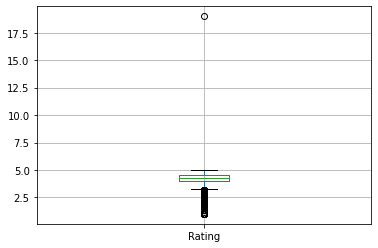

In [11]:
#FOR PROPER VISUALIZATIOON WE CAN USE BOXPLOT
df.boxplot()

As we can see the only numerical columns right now  is only Rating column  . And also we can see some outliers out there.
Yes there are some other columns with numerical data but due to lack of data cleaning and manipulation their format are set as object. Further we will work on them as well



# DATA CLEANING

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Even though the RATING,REVIEWS,PRICE AND INSTALL are numerical columns yet the data type of these columns is given as object so we need dive into the data of this columns to check and clean it properly


# CHECKING OUTLIERS AND REMOVING IT

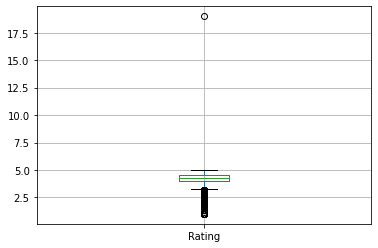

In [13]:
df.boxplot()

In [14]:
df["Rating"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [15]:
df[df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
#Check the data has some random ratings or not
df["Rating"].value_counts()
df.drop([10472],inplace=True)


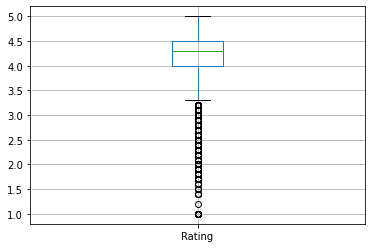

In [17]:
df.boxplot()

As we can see above box plot where the outlier has been removed from the Rating column.

In [19]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [20]:
#LETS KEEP OUR ORIGINAL DATA:
df_org=df.copy()

# CHECKING NULL VALUES AND REMOVING THEM


In [21]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

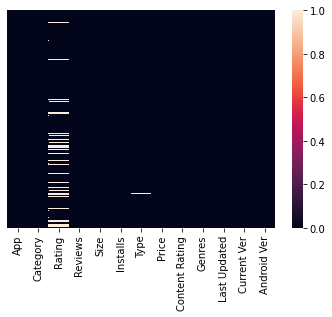

In [22]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False)


AS WE CAN SEE ALOT OF MISSING VALUES ARE PRESENT IN RATING COLUMNS WHICH NEEDS OT BE FIXED

In [23]:
rating_median=df.loc[~df["Rating"].isnull(),"Rating"].median()

In [24]:
df["Rating"]=df["Rating"].fillna(rating_median)

In [25]:
df["Rating"].isnull().sum()

0

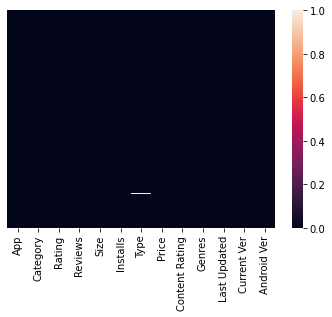

In [26]:
sns.heatmap(df.isnull(),yticklabels=False)

As we can see that all our NAN values are replace by median values in tha columns.

**Handlin NAN values in Type column**

In [27]:
df["Type"].isnull().sum()

1

In [28]:
df["Type"]=df["Type"].fillna(df["Type"].mode()[0])
df["Type"].isnull().sum()

0

In [29]:

df["Current Ver"]=df["Current Ver"].fillna(df["Current Ver"].mode()[0])
df["Android Ver"]=df["Android Ver"].fillna(df["Android Ver"].mode()[0])

In [30]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

As we can see that we have successfully handled all the missing values with out comproising our orginal data set. We have preserved the useful data and cleaned the data in unbiased manner


# DATA MANIPULATION:
We are going to check the data types in every column and change them into the format they are should to be. For example Price is not of type Object. It is of integer type so to change it well do some data manipulation.

In [31]:
#LETS CHECK THE DATA TYPE:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [34]:
def changing(x):
  if "$" in str(x):
    return str(x).replace("$","")
  else:
    return str(x)

In [35]:
df["Price"]=df["Price"].apply(lambda x: changing(x))
df["Price"]=df["Price"].apply(lambda x: float(x))

In [36]:
df["Installs"]=df["Installs"].apply(lambda x: str(x).replace("+","") if "+" in str(x) else str(x))
df["Installs"]=df["Installs"].apply(lambda x: str(x).replace(",","") if "," in str(x) else str(x))

df["Installs"]=df["Installs"].apply(lambda x: float(x))

In [37]:
df["Reviews"]=pd.to_numeric(df["Reviews"])

In [38]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


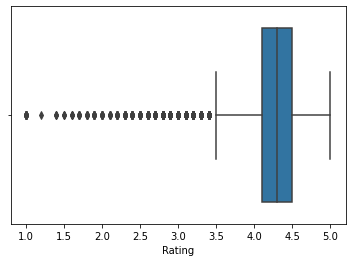

In [39]:
sns.boxplot(x="Rating",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


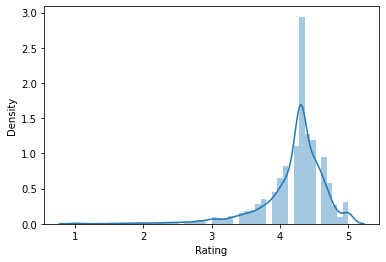

In [40]:
import seaborn as sns
sns.distplot(df.Rating);

In [41]:
df["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [42]:
def conv(x):
  if "M" in str(x):
    a=str(x).replace("M","")
    aa=float(a)
    aa=aa*1024
    return aa
  elif "k" in str(x):
    b=str(x).replace("k","")
    bb=float(b)
    return bb
  else:
    c=str(x)
    return c

In [43]:
df["Size"]=df["Size"].apply(lambda x: conv(x))

In [44]:
df["Size"].value_counts()

Varies with device    1695
11264.0                198
12288.0                196
14336.0                194
13312.0                191
                      ... 
430.0                    1
429.0                    1
200.0                    1
460.0                    1
619.0                    1
Name: Size, Length: 460, dtype: int64

In [45]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [46]:
df["Size"].isnull().sum()

1695

In [47]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


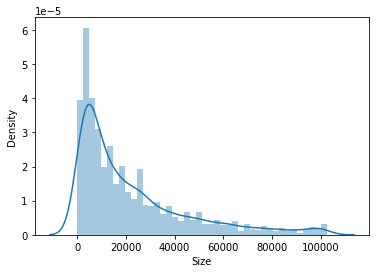

In [48]:

sns.distplot(df[df['Size'] != 'NaN']['Size'])




1. Most of the values in Size column are "Value varies with device", replacing them with (mean, medium or mode) make no sense.Such values are replaced as NaN.

2. All other data containing MB and K are converted into suitable format.

3. Size column is skewed towards the right which means most of the data falls toward right side.




# **EXPLORATORY DATA ANALYSIS**

In [54]:


#make pairplots
#sns.pairplot(df, vars = ["Rating","Price","Reviews"], dropna = True)

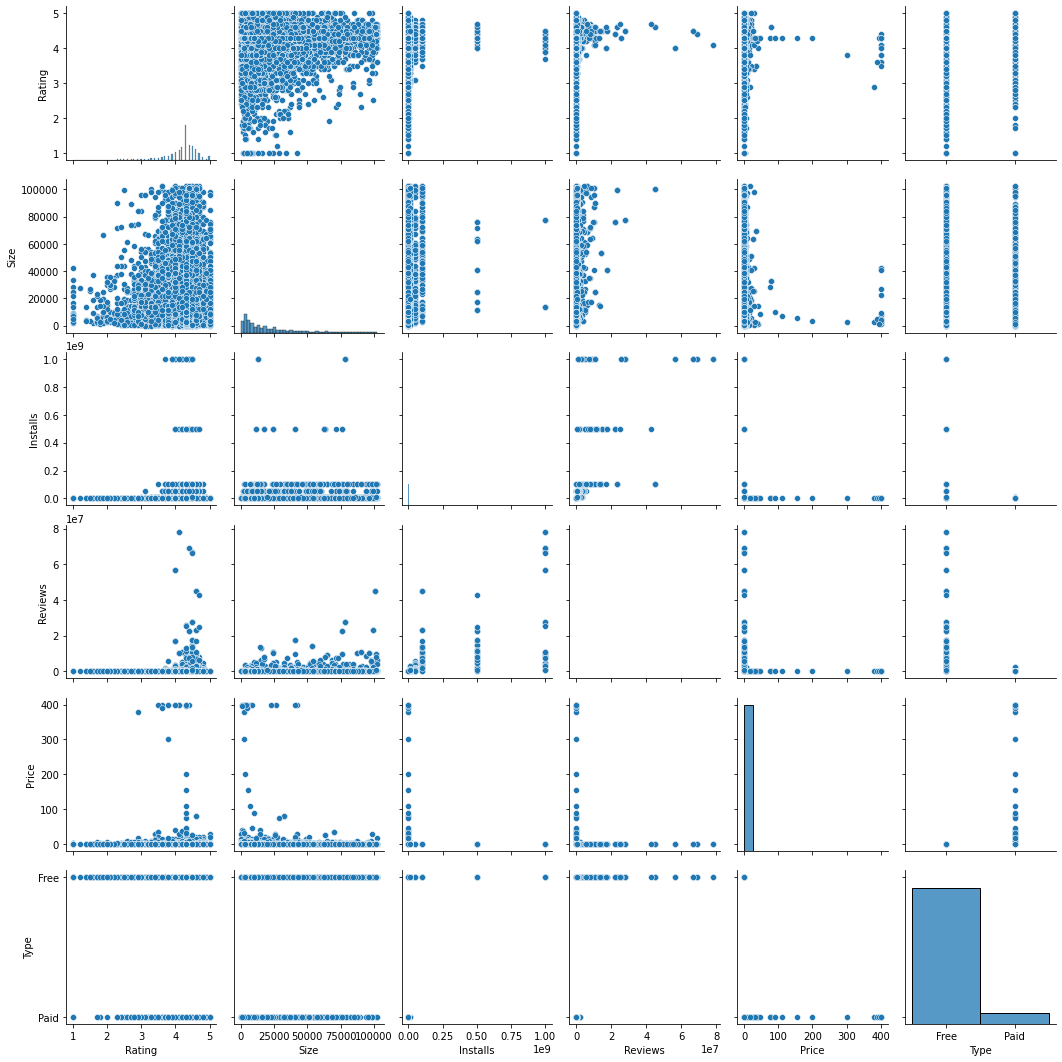

In [59]:
sns.pairplot(df,vars=['Rating','Size', 'Installs', 'Reviews', 'Price','Type'],dropna=True)


1. Paid app has rating greater than 2.
2. Free app gets more reveiews than paid app
3. Free app has more installs than paid app
4. More reveiws are seen as installation rate increases for particular app


# 1. HOW MUCH OF MARKET IS CAPTURED BY PAID APP AND FREE APP

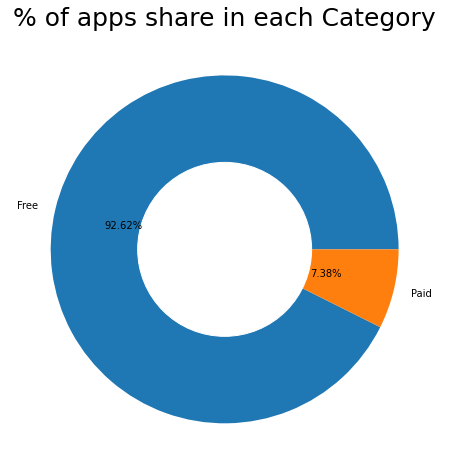

In [68]:
plt.figure(figsize=(8,8))
plt.pie(df.Type.value_counts(), labels=df.Type.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

# **WHICH CATEGORY HAS THE HIGHEST NUMBER OF APP** 

In [73]:
y=list(df['Category'].value_counts())

In [74]:
x=list(df['Category'].value_counts().index)

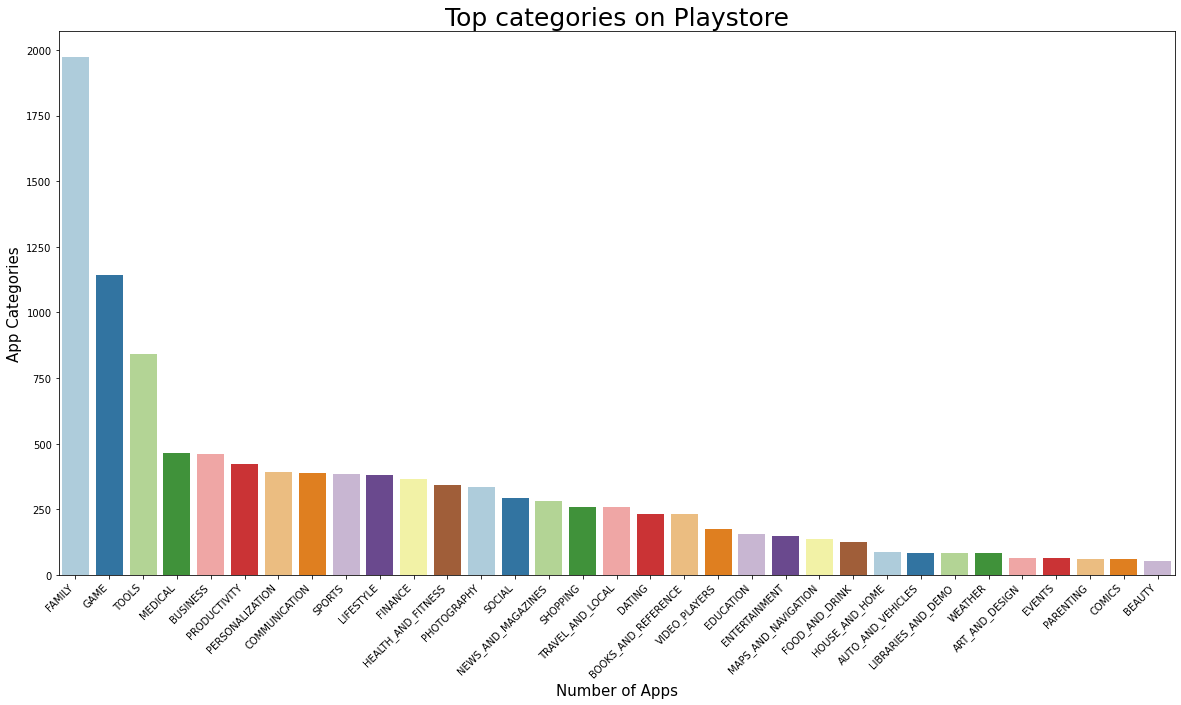

In [76]:
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(x=x, y = y, palette= "Paired")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

# **WHICH CATEGORIES HAS HIGH PRICE**

Text(0.5, 1.0, 'Categories with price')

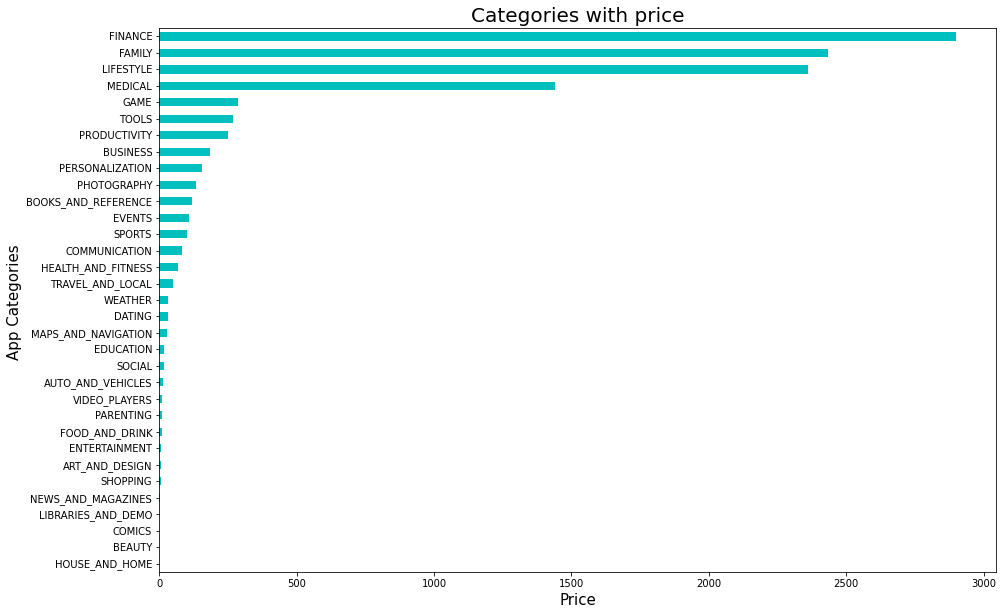

In [83]:
a = df.groupby(['Category'])['Price'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('App Categories ', fontsize = 15)
plt.xlabel('Price', fontsize = 15)
plt.xticks()
plt.title('Categories with price', fontsize = 20)

WHICH CATERGORY HAS HIGHEST INSTALLS

Text(0.5, 1.0, 'Total app installs in each category')

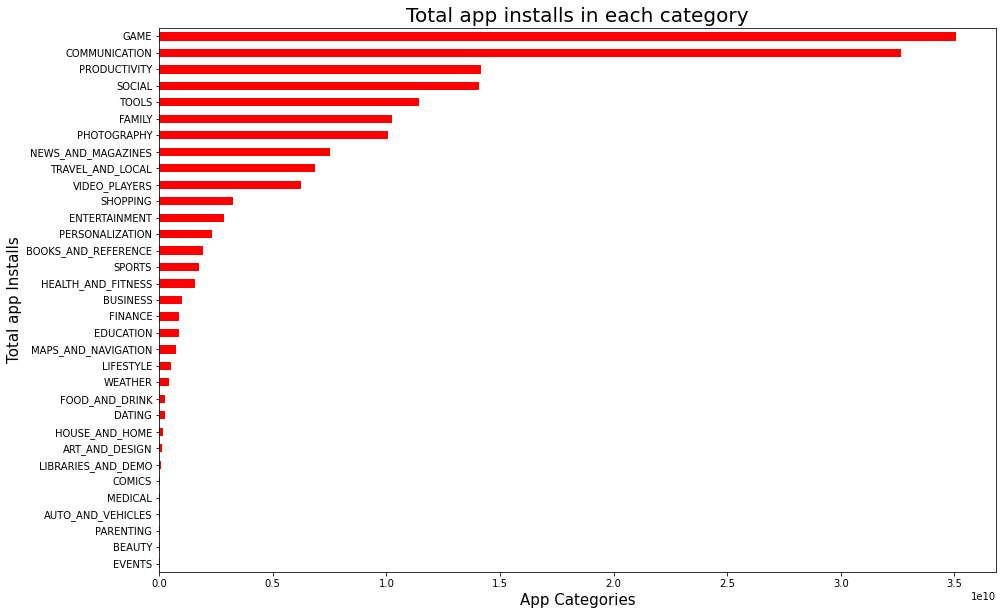

In [97]:
 
a=df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'red', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)